In [1]:
import pandas as pd

Mission_Headhunter = pd.read_csv('Mission_Headhunter.csv')

In [2]:
seniority_minCut = Mission_Headhunter[['email','minHeadhunterCut','seniorityAsRecruiter']]
seniority_minCut = seniority_minCut.dropna()
seniority_minCut

email  minHeadhunterCut seniorityAsRecruiter
10   arthur.bergmanis@behberg.com              0.50         3 to 5 years
11               ivavot@seznam.cz              0.50         3 to 5 years
12         kolodziejm83@gmail.com              0.50         3 to 5 years
13           lery@becrosspath.com              0.50     Less than 1 year
14        lubarrantes08@gmail.com              0.50    10 years and more
..                            ...               ...                  ...
483      guillaume.chen@edhec.com              0.67        No experience
484        jordan@becrosspath.com              0.67         1 to 2 years
485          lery@becrosspath.com              0.67     Less than 1 year
486      philippe@becrosspath.com              0.67        No experience
487           tejasnvlb@gmail.com              0.67         3 to 5 years

[358 rows x 3 columns]

In [3]:
# we need to encode the categorical data to let them analysable
mymap = {'No experience':0,'Less than 1 year':0.5, '1 to 2 years':1.5, '3 to 5 years':4, '6 to 9 years':7.5, '10 years and more':15}

seniority_minCut = seniority_minCut.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [4]:
seniority_minCut

email  minHeadhunterCut  seniorityAsRecruiter
10   arthur.bergmanis@behberg.com              0.50                   4.0
11               ivavot@seznam.cz              0.50                   4.0
12         kolodziejm83@gmail.com              0.50                   4.0
13           lery@becrosspath.com              0.50                   0.5
14        lubarrantes08@gmail.com              0.50                  15.0
..                            ...               ...                   ...
483      guillaume.chen@edhec.com              0.67                   0.0
484        jordan@becrosspath.com              0.67                   1.5
485          lery@becrosspath.com              0.67                   0.5
486      philippe@becrosspath.com              0.67                   0.0
487           tejasnvlb@gmail.com              0.67                   4.0

[358 rows x 3 columns]

In [5]:
# to only have the lowest minHeadhunterCut for each headhunter
seniority_minCut = seniority_minCut.groupby(["email","seniorityAsRecruiter"], as_index=False).min()

In [6]:
seniority_minCut.corr()

seniorityAsRecruiter  minHeadhunterCut
seniorityAsRecruiter              1.000000         -0.040358
minHeadhunterCut                 -0.040358          1.000000

The relationship between two variables is generally considered strong when their r value is larger than 0.7.

Here we can see there is a tendency that the greater the seniority, the smaller the minHeadhunterCut. However, the correlation coefficient is much smaller than 0.7, which means the correlation between those two is small.

## Find the correlation between minSalary of mission accepted and other headhunter features. (Requested by Jordan)

In [7]:
Mission_Headhunter = pd.read_csv('Mission_Headhunter.csv')

minSalary_accepted_analysis = Mission_Headhunter[['salaryMin',
                                                 'email','agency','seniorityAsRecruiter','seniorityAsFreelancer','tncAccepted']]



In [8]:
minSalary_accepted_analysis

salaryMin                         email  \
0      35000.0     benjellounwalid@gmail.com   
1      35000.0   Coralie@cbs-itconsulting.fr   
2      35000.0         elbazeessam@gmail.com   
3      35000.0       f.santhan.pro@gmail.com   
4      35000.0  m.krief@alternativexpert.com   
..         ...                           ...   
490        NaN        lize.manseka@gmail.com   
491        NaN  m.krief@alternativexpert.com   
492        NaN         mehdi@komeoagency.com   
493        NaN   prisca.norservice@gmail.com   
494        NaN  sbouillet@sbsrecrutement.com   

                                                agency seniorityAsRecruiter  \
0                                                  NaN         3 to 5 years   
1                                                  NaN    10 years and more   
2                                                  NaN         6 to 9 years   
3                                                 Hays         1 to 2 years   
4    PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...    10 years and more   
..                                                 ...                  ...   
490                                                AMS         6 to 9 years   
491  PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...    10 years and more   
492                                              KOMEO         6 to 9 years   
493                                                 No         3 to 5 years   
494                                                NaN    10 years and more   

    seniorityAsFreelancer  tncAccepted  
0            3 to 5 years          2.0  
1            3 to 5 years          NaN  
2            3 to 5 years          NaN  
3            3 to 5 years          NaN  
4       10 years and more          3.0  
..                    ...          ...  
490          3 to 5 years          NaN  
491     10 years and more          3.0  
492          1 to 2 years          3.0  
493      Less than 1 year          3.0  
494          3 to 5 years          3.0  

[495 rows x 6 columns]

In [9]:
# to only have the lowest salaryMin for each headhunter

minSalary_accepted_analysis = minSalary_accepted_analysis.join(minSalary_accepted_analysis.groupby('email')['salaryMin'].agg(['min', 'max']), on='email')

In [10]:

# minSalary_accepted_analysis = minSalary_accepted_analysis.drop_duplicates(subset='email')
minSalary_accepted_analysis.head(20)

salaryMin                                  email  \
0     35000.0              benjellounwalid@gmail.com   
1     35000.0            Coralie@cbs-itconsulting.fr   
2     35000.0                  elbazeessam@gmail.com   
3     35000.0                f.santhan.pro@gmail.com   
4     35000.0           m.krief@alternativexpert.com   
5     35000.0  melanie.escobar@global-recruiters.pro   
6     35000.0               nguyen.tpkevin@gmail.com   
7     35000.0                pk@starsconsulting.info   
8     35000.0                 righines.pro@gmail.com   
9     35000.0                 tristan@talentweb3.xyz   
10    24000.0           arthur.bergmanis@behberg.com   
11    24000.0                       ivavot@seznam.cz   
12    24000.0                 kolodziejm83@gmail.com   
13    24000.0                   lery@becrosspath.com   
14    24000.0                lubarrantes08@gmail.com   
15    24000.0                  m.dilov1718@gmail.com   
16    24000.0           martina.miklosova7@gmail.com   
17    24000.0               philippe@becrosspath.com   
18    48000.0           divya.kanaran@festentech.com   
19    48000.0                     frigoglioso@me.com   

                                               agency seniorityAsRecruiter  \
0                                                 NaN         3 to 5 years   
1                                                 NaN    10 years and more   
2                                                 NaN         6 to 9 years   
3                                                Hays         1 to 2 years   
4   PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...    10 years and more   
5                                                 NaN         3 to 5 years   
6                                                 NaN         3 to 5 years   
7                                                  no         6 to 9 years   
8                                                 NaN         3 to 5 years   
9                                                 NaN                  NaN   
10                                   Behman & Bergman         3 to 5 years   
11                                                NaN         3 to 5 years   
12                              My own MK Recruitment         3 to 5 years   
13                                         Cross Path     Less than 1 year   
14                                                NaN    10 years and more   
15                                                 No         3 to 5 years   
16                              Service Club Delivery     Less than 1 year   
17                                         Cross Path        No experience   
18                                   Festen Tecnology    10 years and more   
19                                                NaN    10 years and more   

   seniorityAsFreelancer  tncAccepted      min       max  
0           3 to 5 years          2.0  30000.0   60000.0  
1           3 to 5 years          NaN  35000.0   60000.0  
2           3 to 5 years          NaN  35000.0   60000.0  
3           3 to 5 years          NaN  35000.0   60000.0  
4      10 years and more          3.0  30000.0   65000.0  
5           3 to 5 years          NaN  35000.0   35000.0  
6           3 to 5 years          3.0  35000.0   70000.0  
7           1 to 2 years          3.0  30000.0   65000.0  
8       Less than 1 year          3.0  35000.0   60000.0  
9                    NaN          NaN  35000.0   35000.0  
10          3 to 5 years          3.0  24000.0   48000.0  
11     10 years and more          3.0  24000.0   65000.0  
12          3 to 5 years          3.0  24000.0   65000.0  
13         No experience          3.0  24000.0  128000.0  
14      Less than 1 year          3.0   8320.0   65000.0  
15      Less than 1 year          3.0  24000.0   75000.0  
16          1 to 2 years          3.0  24000.0   65000.0  
17         No experience          3.0   8320.0  166912.0  
18          6 to 9 years          3.0   8320.0   85000.0  
19      

In [11]:
# import os  
# os.makedirs('folder/subfolder', exist_ok=True)  
# minSalary_accepted_analysis.to_csv('folder/subfolder/minSalary_accepted_analysis.csv')  

In [12]:
minSalary_accepted_analysis = minSalary_accepted_analysis[['agency','seniorityAsRecruiter','seniorityAsFreelancer','tncAccepted',
                                                          'min','max']]

In [13]:
minSalary_accepted_analysis

agency seniorityAsRecruiter  \
0                                                  NaN         3 to 5 years   
1                                                  NaN    10 years and more   
2                                                  NaN         6 to 9 years   
3                                                 Hays         1 to 2 years   
4    PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...    10 years and more   
..                                                 ...                  ...   
490                                                AMS         6 to 9 years   
491  PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...    10 years and more   
492                                              KOMEO         6 to 9 years   
493                                                 No         3 to 5 years   
494                                                NaN    10 years and more   

    seniorityAsFreelancer  tncAccepted      min      max  
0            3 to 5 years          2.0  30000.0  60000.0  
1            3 to 5 years          NaN  35000.0  60000.0  
2            3 to 5 years          NaN  35000.0  60000.0  
3            3 to 5 years          NaN  35000.0  60000.0  
4       10 years and more          3.0  30000.0  65000.0  
..                    ...          ...      ...      ...  
490          3 to 5 years          NaN  30000.0  30000.0  
491     10 years and more          3.0  30000.0  65000.0  
492          1 to 2 years          3.0      NaN      NaN  
493      Less than 1 year          3.0  30000.0  65000.0  
494          3 to 5 years          3.0  37000.0  43000.0  

[495 rows x 6 columns]

In [14]:
# we need to encode the categorical data to let them analysable
mymap = {'No experience':0,'Less than 1 year':0.5, '1 to 2 years':1.5, '3 to 5 years':4, '6 to 9 years':7.5, '10 years and more':15,
        'No':0, 'NO':0}

minSalary_accepted_analysis = minSalary_accepted_analysis.applymap(lambda s: mymap.get(s) if s in mymap else s)
minSalary_accepted_analysis = minSalary_accepted_analysis.fillna(0)
minSalary_accepted_analysis

agency  seniorityAsRecruiter  \
0                                                    0                   4.0   
1                                                    0                  15.0   
2                                                    0                   7.5   
3                                                 Hays                   1.5   
4    PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...                  15.0   
..                                                 ...                   ...   
490                                                AMS                   7.5   
491  PROFIL RESEARCH AND ALTERNATIVE EXPERT AND CRI...                  15.0   
492                                              KOMEO                   7.5   
493                                                  0                   4.0   
494                                                  0                  15.0   

     seniorityAsFreelancer  tncAccepted      min      max  
0                      4.0          2.0  30000.0  60000.0  
1                      4.0          0.0  35000.0  60000.0  
2                      4.0          0.0  35000.0  60000.0  
3                      4.0          0.0  35000.0  60000.0  
4                     15.0          3.0  30000.0  65000.0  
..                     ...          ...      ...      ...  
490                    4.0          0.0  30000.0  30000.0  
491                   15.0          3.0  30000.0  65000.0  
492                    1.5          3.0      0.0      0.0  
493                    0.5          3.0  30000.0  65000.0  
494                    4.0          3.0  37000.0  43000.0  

[495 rows x 6 columns]

In [15]:
# df['a'] = df['a'].apply(lambda x: x + 1)

minSalary_accepted_analysis['agency'] = minSalary_accepted_analysis['agency'].map(lambda a: a!=0)

In [16]:
minSalary_accepted_analysis

agency  seniorityAsRecruiter  seniorityAsFreelancer  tncAccepted  \
0     False                   4.0                    4.0          2.0   
1     False                  15.0                    4.0          0.0   
2     False                   7.5                    4.0          0.0   
3      True                   1.5                    4.0          0.0   
4      True                  15.0                   15.0          3.0   
..      ...                   ...                    ...          ...   
490    True                   7.5                    4.0          0.0   
491    True                  15.0                   15.0          3.0   
492    True                   7.5                    1.5          3.0   
493   False                   4.0                    0.5          3.0   
494   False                  15.0                    4.0          3.0   

         min      max  
0    30000.0  60000.0  
1    35000.0  60000.0  
2    35000.0  60000.0  
3    35000.0  60000.0  
4    30000.0  65000.0  
..       ...      ...  
490  30000.0  30000.0  
491  30000.0  65000.0  
492      0.0      0.0  
493  30000.0  65000.0  
494  37000.0  43000.0  

[495 rows x 6 columns]

In [17]:
# change True/False into 1/0
minSalary_accepted_analysis['agency'] = minSalary_accepted_analysis['agency'].map(lambda b: b*1)

In [18]:
# by now, our data is analysable
minSalary_accepted_analysis

agency  seniorityAsRecruiter  seniorityAsFreelancer  tncAccepted  \
0         0                   4.0                    4.0          2.0   
1         0                  15.0                    4.0          0.0   
2         0                   7.5                    4.0          0.0   
3         1                   1.5                    4.0          0.0   
4         1                  15.0                   15.0          3.0   
..      ...                   ...                    ...          ...   
490       1                   7.5                    4.0          0.0   
491       1                  15.0                   15.0          3.0   
492       1                   7.5                    1.5          3.0   
493       0                   4.0                    0.5          3.0   
494       0                  15.0                    4.0          3.0   

         min      max  
0    30000.0  60000.0  
1    35000.0  60000.0  
2    35000.0  60000.0  
3    35000.0  60000.0  
4    30000.0  65000.0  
..       ...      ...  
490  30000.0  30000.0  
491  30000.0  65000.0  
492      0.0      0.0  
493  30000.0  65000.0  
494  37000.0  43000.0  

[495 rows x 6 columns]

In [19]:
minSalary_accepted_analysis.corr()

agency  seniorityAsRecruiter  seniorityAsFreelancer  \
agency                 1.000000              0.086858               0.085284   
seniorityAsRecruiter   0.086858              1.000000               0.425176   
seniorityAsFreelancer  0.085284              0.425176               1.000000   
tncAccepted            0.298207              0.047823               0.109248   
min                   -0.044171              0.255456               0.088882   
max                    0.016911             -0.098778              -0.163963   

                       tncAccepted       min       max  
agency                    0.298207 -0.044171  0.016911  
seniorityAsRecruiter      0.047823  0.255456 -0.098778  
seniorityAsFreelancer     0.109248  0.088882 -0.163963  
tncAccepted               1.000000 -0.050419  0.423482  
min                      -0.050419  1.000000 -0.132686  
max                       0.423482 -0.132686  1.000000

Here the min means the minimun of SalaryMin, max means the maximun of SalaryMin of the missions they accepted.

positive correlations:
0.298207 tncAccepted & agency: if they have an agency, then they could have higher tncAccepted

0.255456 min & seniorityAsRecruiter: the more senior they are, the higher minimun of SalaryMin they might accept 
(the experienced headhunters tend to accept higher salary missions)

0.423482 max & tncAccepted: headhunters who have higher tncAccepted could have higher maximun of SalaryMin


## Visualisation of Headhunter features

### Visualisation of headhunter onboarded count for each month (later in Aug. We have more data and can see the growing trends)

In [20]:
HeadhunterSigned = pd.read_csv('HeadhunterSigned.csv')

In [21]:
DateOnboarded = HeadhunterSigned[['Date Onboarded']]

# use the dateonboarded

In [22]:
DateOnboarded

Date Onboarded
0    15/5/2023 13:10
1    14/5/2023 21:09
2    12/5/2023 19:25
3    12/5/2023 17:37
4    12/5/2023 13:30
..               ...
339  27/3/2023 20:49
340              NaN
341  27/3/2023 11:43
342              NaN
343  10/2/2023 13:08

[344 rows x 1 columns]

In [23]:
DateOnboarded['Date Onboarded'] = pd.to_datetime(DateOnboarded['Date Onboarded'], format="%d/%m/%Y %M:%S").dt.strftime('%Y-%m')

/var/folders/g2/wtzv0kbn6sg1hy0s50dcj_780000gn/T/ipykernel_5183/1632022853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DateOnboarded['Date Onboarded'] = pd.to_datetime(DateOnboarded['Date Onboarded'], format="%d/%m/%Y %M:%S").dt.strftime('%Y-%m')


In [24]:
DateOnboarded

Date Onboarded
0          2023-05
1          2023-05
2          2023-05
3          2023-05
4          2023-05
..             ...
339        2023-03
340            NaN
341        2023-03
342            NaN
343        2023-02

[344 rows x 1 columns]

In [25]:
DateOnboarded['Date Onboarded'].value_counts()

2023-03    121
2023-04    107
2023-05     40
2023-02      8
Name: Date Onboarded, dtype: int64

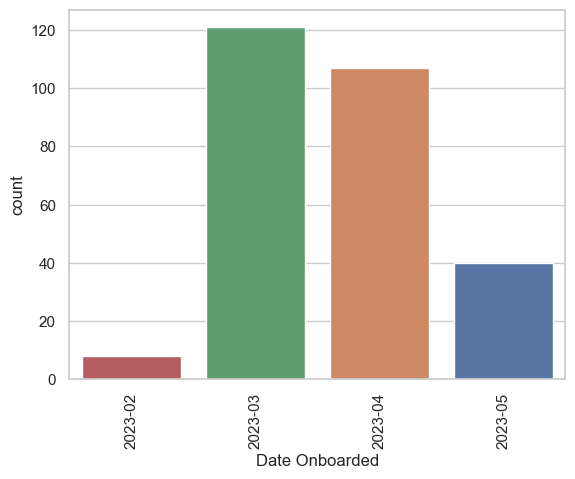

In [26]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plot = sns.countplot(x=DateOnboarded['Date Onboarded'])
plot.tick_params(axis='x', rotation=90)
plot.invert_xaxis()



In [27]:
# for the signupdate
SignupDate = HeadhunterSigned[['Signup Date']]

SignupDate['Signup Date'] = pd.to_datetime(SignupDate['Signup Date'], format="%d/%m/%Y %M:%S").dt.strftime('%Y-%m')

SignupDate['Signup Date'].value_counts()

/var/folders/g2/wtzv0kbn6sg1hy0s50dcj_780000gn/T/ipykernel_5183/2497473674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SignupDate['Signup Date'] = pd.to_datetime(SignupDate['Signup Date'], format="%d/%m/%Y %M:%S").dt.strftime('%Y-%m')


2023-04    122
2023-03     96
2023-05     46
2023-01     37
2023-02     28
2022-12     15
Name: Signup Date, dtype: int64

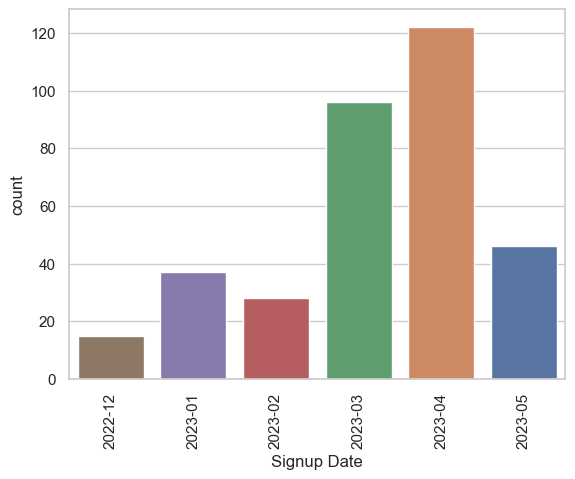

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plot_SignupDate = sns.countplot(x=SignupDate['Signup Date'])
plot_SignupDate.tick_params(axis='x', rotation=90)
plot_SignupDate.invert_xaxis()


### Visualisation of Headhunter latest activity time

In [29]:
LatestActivity = HeadhunterSigned[['Latest Activity']]

In [30]:
LatestActivity = LatestActivity.dropna()

In [31]:
LatestActivity.dtypes

Latest Activity    object
dtype: object

In [32]:
LatestActivity['Latest Activity'] = pd.to_datetime(LatestActivity['Latest Activity'], format="%d/%m/%Y %M:%S")

In [33]:
LatestActivity

Latest Activity
0   2023-05-15 00:13:55
1   2023-05-14 00:19:09
2   2023-05-12 00:17:30
3   2023-05-12 00:15:47
4   2023-05-15 00:08:51
..                  ...
328 2023-04-25 00:11:20
330 2023-05-09 00:15:22
334 2023-04-26 00:15:13
339 2023-04-19 00:10:07
343 2023-05-02 00:09:36

[188 rows x 1 columns]

In [35]:
import datetime
LatestActivity['TimeTillNow'] = datetime.datetime.now() - LatestActivity['Latest Activity'] 

In [36]:
LatestActivity

Latest Activity             TimeTillNow
0   2023-05-15 00:13:55  7 days 14:30:34.685726
1   2023-05-14 00:19:09  8 days 14:25:20.685726
2   2023-05-12 00:17:30 10 days 14:26:59.685726
3   2023-05-12 00:15:47 10 days 14:28:42.685726
4   2023-05-15 00:08:51  7 days 14:35:38.685726
..                  ...                     ...
328 2023-04-25 00:11:20 27 days 14:33:09.685726
330 2023-05-09 00:15:22 13 days 14:29:07.685726
334 2023-04-26 00:15:13 26 days 14:29:16.685726
339 2023-04-19 00:10:07 33 days 14:34:22.685726
343 2023-05-02 00:09:36 20 days 14:34:53.685726

[188 rows x 2 columns]

In [37]:
LatestActivity['DaysTillNow'] = LatestActivity['TimeTillNow'].astype(str).str[0:2]
LatestActivity

Latest Activity             TimeTillNow DaysTillNow
0   2023-05-15 00:13:55  7 days 14:30:34.685726          7 
1   2023-05-14 00:19:09  8 days 14:25:20.685726          8 
2   2023-05-12 00:17:30 10 days 14:26:59.685726          10
3   2023-05-12 00:15:47 10 days 14:28:42.685726          10
4   2023-05-15 00:08:51  7 days 14:35:38.685726          7 
..                  ...                     ...         ...
328 2023-04-25 00:11:20 27 days 14:33:09.685726          27
330 2023-05-09 00:15:22 13 days 14:29:07.685726          13
334 2023-04-26 00:15:13 26 days 14:29:16.685726          26
339 2023-04-19 00:10:07 33 days 14:34:22.685726          33
343 2023-05-02 00:09:36 20 days 14:34:53.685726          20

[188 rows x 3 columns]

In [38]:
LatestActivity['DaysTillNow'] = LatestActivity['DaysTillNow'].astype(int)

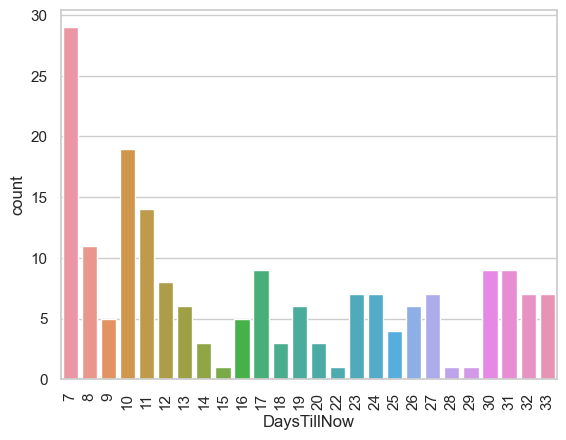

In [39]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plot_DaysTillNow = sns.countplot(x=LatestActivity['DaysTillNow'])
plot_DaysTillNow.tick_params(axis='x', rotation=90)
# plot_DaysTillNow.invert_xaxis()


## Count mission (job location) and headhunter (target area) number of one location and see if they are balenced

In [40]:
# first we visualise the geolocation by country, because plotly has  built-in geometries for countries

headhunter_TargetLocation = pd.read_csv('headhunter_TargetLocation.csv')
Mission_Location = pd.read_csv('Mission_Location.csv')

In [41]:
# select useful columns
headhunter_TargetLocation = headhunter_TargetLocation[['code']]
Mission_Location = Mission_Location[['code']]

In [42]:
df1 = headhunter_TargetLocation.groupby(['code'])['code'].count().reset_index(name="headhunter_TargetLocation_count")
df2 = Mission_Location.groupby(['code'])['code'].count().reset_index(name="Mission_Location_count")


In [88]:
# join two df
df3 = df1.join(df2.set_index('code'), on='code')

# to change all NaN values to 0
df3 = df3.fillna(0)  

# calculate the balance number using subtraction
# balance_number = headhunter_TargetLocation_count - Mission_Location_count
df3['balace_number'] = df3['headhunter_TargetLocation_count'] - df3['Mission_Location_count']
df3.head()

KeyError: 'headhunter_TargetLocation_count'

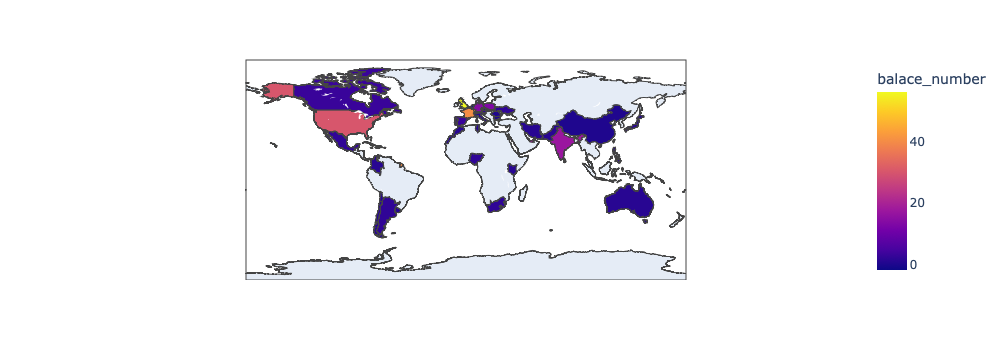

In [44]:
import plotly.express as px

fig = px.choropleth(df3, locations="code",
                    color="balace_number", # lifeExp is a column of gapminder
                    hover_name="code", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

We can see in UK, France, USA, we have much more headhunters than the missions.

### above the count is not exact, we could count them in different sectors or different positions

In [45]:
# to prepare the company data
# extract country code, sectors, positions data
Mission_Location_complete = pd.read_csv('Mission_Location_complete.csv')
Company_Sector = pd.read_csv('Company_Sector.csv')
Company_Sector.head()


company                                             sector
0     verti  agriculture-construction-mining-machinery-manu...
1  altamoda                                            banking
2   veesion                    business-intelligence-platforms
3      riot                      computer-and-network-security
4      kuai                                          ecommerce

In [46]:
Mission_Location_complete = Mission_Location_complete[['code', 'position', 'company']]
Mission_Location_complete.head()

code                   position    company
0  USA              ios-developer  staytouch
1  USA          backend-developer  staytouch
2  USA         frontend-developer  staytouch
3  USA  quality-assurance-analyst  staytouch
4  CHN                 head-of-it       kuai

In [47]:
# join two df
Mission_data = Mission_Location_complete.join(Company_Sector.set_index('company'), on='company')
# Mission_data.count()
Mission_data
# Problem to be solved: the mission_location should be in the same level, not mixed with country and states !!!
# also, the headhunter target location should be in the same level

code                      position    company  \
0   USA                 ios-developer  staytouch   
1   USA             backend-developer  staytouch   
2   USA            frontend-developer  staytouch   
3   USA     quality-assurance-analyst  staytouch   
4   CHN                    head-of-it       kuai   
..  ...                           ...        ...   
89  NaN                  social-media      qumin   
90  NaN  business-development-manager      qumin   
91  NaN                        others     alenia   
92  NaN                        others     alenia   
93  NaN             android-developer  staytouch   

                                 sector  
0         it-services-and-it-consulting  
1         it-services-and-it-consulting  
2         it-services-and-it-consulting  
3         it-services-and-it-consulting  
4                             ecommerce  
..                                  ...  
89                            marketing  
90                            marketing  
91  information-technology-and-services  
92  information-technology-and-services  
93        it-services-and-it-consulting  

[98 rows x 4 columns]

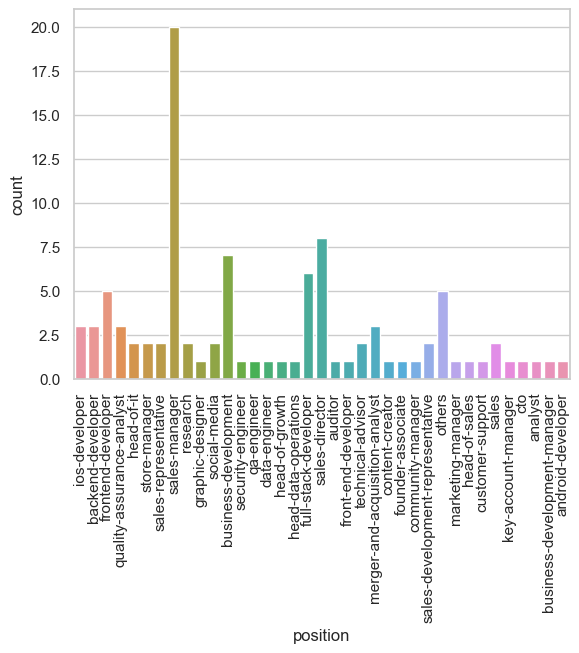

In [48]:
# Mission visualisation

# position count
import seaborn as sns
sns.set_theme(style="whitegrid")

plot_position = sns.countplot(x=Mission_data['position'])
plot_position.tick_params(axis='x', rotation=90)

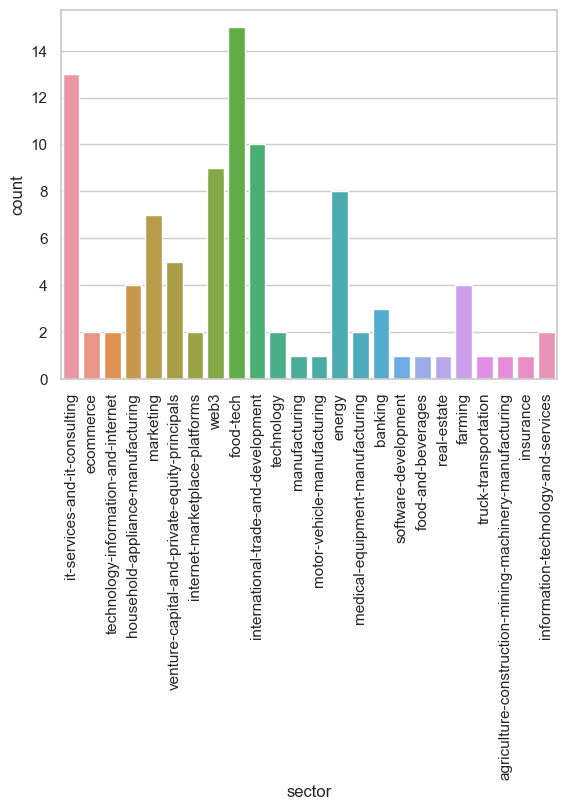

In [49]:
# Mission visualisation

# sector count
import seaborn as sns
sns.set_theme(style="whitegrid")

plot_sector = sns.countplot(x=Mission_data['sector'])
plot_sector.tick_params(axis='x', rotation=90)

In [50]:
# count data

# count Mission sector for_each_Country
df1 = Mission_data.groupby(['code','sector'])['sector'].count().reset_index(name="Sector_count_for_each_Country")
df1.head()


code                               sector  Sector_count_for_each_Country
0  BEL                            food-tech                              3
1  BGR  international-trade-and-development                              1
2  CHE                                 web3                              2
3  CHN                            ecommerce                              2
4  CHN  technology-information-and-internet                              2

In [51]:
# count Mission position for_each_Country
df2 = Mission_data.groupby(['code','position'])['position'].count().reset_index(name="Position_count_for_each_Country")
df2.head()

code              position  Position_count_for_each_Country
0  BEL        sales-director                                2
1  BEL         sales-manager                                1
2  BGR         sales-manager                                1
3  CHE    frontend-developer                                1
4  CHE  full-stack-developer                                1

In [52]:
# to prepare the headhunter data
HeadhunterPosition = pd.read_csv('HeadhunterPosition.csv')
HeadhunterSector = pd.read_csv('HeadhunterSector.csv')
headhunter_TargetLocation = pd.read_csv('headhunter_TargetLocation.csv')

In [53]:
# join three df
df_hh_position_Sector = HeadhunterPosition.join(HeadhunterSector.set_index('headhunter'), on='headhunter')
df_hh_position_Sector

headhunter_data = df_hh_position_Sector.join(headhunter_TargetLocation.set_index('headhunter'), on='headhunter')
headhunter_data = headhunter_data[['position', 'sector', 'code']]
headhunter_data.head()
# headhunter_data.count()

position                                            sector code
0  3d-artist  abrasives-and-nonmetallic-minerals-manufacturing  NaN
0  3d-artist  abrasives-and-nonmetallic-minerals-manufacturing  NaN
0  3d-artist  abrasives-and-nonmetallic-minerals-manufacturing  NaN
0  3d-artist  abrasives-and-nonmetallic-minerals-manufacturing  CHN
0  3d-artist  abrasives-and-nonmetallic-minerals-manufacturing  ARE

In [54]:
# count data

# count Headhunter sector for_each_Country
df3 = headhunter_data.groupby(['code','sector'])['sector'].count().reset_index(name="Sector_count_for_each_Country")
df3.head()


code                                            sector  \
0  ARE  abrasives-and-nonmetallic-minerals-manufacturing   
1  ARE                          accomodation-hospitality   
2  ARE                                        accounting   
3  ARE                                    administration   
4  ARE                        administrative-and-support   

   Sector_count_for_each_Country  
0                             65  
1                             65  
2                             95  
3                            202  
4                            136

In [55]:
# count Headhunter position for_each_Country
df4 = headhunter_data.groupby(['code','position'])['position'].count().reset_index(name="Position_count_for_each_Country")
df4
# .head()

code             position  Position_count_for_each_Country
0     ARE            3d-artist                               16
1     ARE       aandp-mechanic                               16
2     ARE        aba-therapist                               16
3     ARE     academic-advisor                               26
4     ARE    account-executive                               10
...   ...                  ...                              ...
2482  ZAF       graphic-artist                               12
2483  ZAF  hr-business-partner                               12
2484  ZAF           hr-manager                               12
2485  ZAF           management                               12
2486  ZAF          ppc-manager                               12

[2487 rows x 3 columns]

In [56]:
# example: France (FRA) Sector balance

# France mission data
df_Mission_Sector_FRA = df1.loc[df1['code'] == 'FRA']
df_Mission_Position_FRA = df2.loc[df2['code'] == 'FRA']

# France headhunter data
df_hh_Sector_FRA = df3.loc[df3['code'] == 'FRA']
df_hh_Position_FRA = df4.loc[df4['code'] == 'FRA']


In [57]:
# left join:    left_df.merge(right_df, on='user_id', how='left')

# Example 1: France Missions and Headhunters in sectors
df_Mission_Sector_FRA.merge(df_hh_Sector_FRA, on='sector', how='left')

code_x                                         sector  \
0    FRA                                         energy   
1    FRA                                      food-tech   
2    FRA                                  manufacturing   
3    FRA                    motor-vehicle-manufacturing   
4    FRA                                     technology   
5    FRA  venture-capital-and-private-equity-principals   
6    FRA                                           web3   

   Sector_count_for_each_Country_x code_y  Sector_count_for_each_Country_y  
0                                3    NaN                              NaN  
1                                3    FRA                             41.0  
2                                1    NaN                              NaN  
3                                1    NaN                              NaN  
4                                1    FRA                            133.0  
5                                1    NaN                              NaN  
6                                3    FRA                              2.0

In [58]:
# Example 2: France Missions and Headhunters in positions
df_Mission_Position_FRA.merge(df_hh_Position_FRA, on='position', how='left')

code_x              position  Position_count_for_each_Country_x code_y  \
0    FRA               auditor                                  1    NaN   
1    FRA  business-development                                  4    FRA   
2    FRA   front-end-developer                                  1    FRA   
3    FRA    frontend-developer                                  1    FRA   
4    FRA  full-stack-developer                                  1    FRA   
5    FRA        sales-director                                  2    FRA   
6    FRA         sales-manager                                  1    FRA   
7    FRA     technical-advisor                                  2    NaN   

   Position_count_for_each_Country_y  
0                                NaN  
1                               31.0  
2                               16.0  
3                               19.0  
4                               19.0  
5                               14.0  
6                               31.0  
7                                NaN

## Clustering of Headhunters (by Activity and Ability)

### Clustering of Headhunters Ability

In [59]:
# Firstly, we do ability
# the chosen features of ability are:
# HeadhunterCompanySize target count
# HeadhunterHardSkill count
# HeadhunterLanguage count
# HeadhunterLocationTarget count
# HeadhunterPosition target count
# HeadhunterSector target count
# Headhunter seniorityAsRecruiter

# more to be included:
# Headhunter university ranking
# Headhunter agency yes/no
# usedTools countS




# Secondly, we do activity (any feaures about the mission and activity on the platform)
# the chosen features of activity are:
# rating
# points
# lastest activity till now (in days)
# mission accepted number/onboarded days till now
# candidate proposed number/onboarded days till now
# candidate matched successful rate



In [60]:
# Firstly, we do ability
Headhunter = pd.read_csv('Headhunter.csv')
Headhunter = Headhunter[['email','seniorityAsRecruiter']]
Headhunter = Headhunter.rename(columns={'email': 'headhunter'})


HeadhunterCompanySize = pd.read_csv('HeadhunterCompanySize.csv')
HeadhunterHardSkill = pd.read_csv('HeadhunterHardSkill.csv')
HeadhunterLanguage = pd.read_csv('HeadhunterLanguage.csv')
HeadhunterLocationTarget = pd.read_csv('HeadhunterLocationTarget.csv')
HeadhunterPosition = pd.read_csv('HeadhunterPosition.csv')
HeadhunterSector = pd.read_csv('HeadhunterSector.csv')


In [61]:
Headhunter

headhunter seniorityAsRecruiter
0               120148972@qq.com         6 to 9 years
1           abenslimen@gmail.com         3 to 5 years
2           adilaait75@gmail.com         3 to 5 years
3        ahmedidenbrid@gmail.com                  NaN
4           aigulmel17@gmail.com         1 to 2 years
..                           ...                  ...
252      yadavpoojamba@gmail.com         6 to 9 years
253  yankaweyadjobimey@yahoo.com         6 to 9 years
254     yashkothari419@gmail.com     Less than 1 year
255          ydaisy074@gmail.com     Less than 1 year
256             zoe@astranova.io    10 years and more

[257 rows x 2 columns]

In [62]:

HeadhunterCompanySize_count = HeadhunterCompanySize.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterCompanySize_count")
HeadhunterCompanySize_count.head(3)

headhunter  HeadhunterCompanySize_count
0    Coralie@cbs-itconsulting.fr                            4
1  Mail.djibril.fofana@gmail.com                            6
2           adilaait75@gmail.com                            4

In [63]:
HeadhunterHardSkill_count = HeadhunterHardSkill.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterHardSkill_count")
HeadhunterHardSkill_count.head(3)

headhunter  HeadhunterHardSkill_count
0      120148972@qq.com                          3
1  abenslimen@gmail.com                         16
2  adilaait75@gmail.com                          6

In [64]:
HeadhunterLanguage_count = HeadhunterLanguage.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterLanguage_count")
HeadhunterLanguage_count.head(3)

headhunter  HeadhunterLanguage_count
0    Coralie@cbs-itconsulting.fr                         2
1  Mail.djibril.fofana@gmail.com                         2
2         Prince@becrosspath.com                         2

In [65]:
HeadhunterLocationTarget_count = HeadhunterLocationTarget.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterLocationTarget_count")
HeadhunterLocationTarget_count.head(3)

headhunter  HeadhunterLocationTarget_count
0               120148972@qq.com                               1
1    Coralie@cbs-itconsulting.fr                               2
2  Mail.djibril.fofana@gmail.com                               3

In [66]:
HeadhunterPositionTarget_count = HeadhunterPosition.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterPositionTarget_count")
HeadhunterPositionTarget_count.head(3)

headhunter  HeadhunterPositionTarget_count
0               120148972@qq.com                               1
1    Coralie@cbs-itconsulting.fr                               3
2  Mail.djibril.fofana@gmail.com                               5

In [67]:
HeadhunterSectorTarget_count = HeadhunterSector.groupby(['headhunter'])['headhunter'].count().reset_index(name="HeadhunterSectorTarget_count")
HeadhunterSectorTarget_count.head(3)

headhunter  HeadhunterSectorTarget_count
0               120148972@qq.com                             1
1    Coralie@cbs-itconsulting.fr                             3
2  Mail.djibril.fofana@gmail.com                             1

In [68]:
# then we outer join all those dataframes:
Headhunter_Ability=pd.merge(HeadhunterSectorTarget_count,HeadhunterPositionTarget_count, on='headhunter', how='outer').merge(
    HeadhunterLocationTarget_count, on='headhunter', how='outer').merge(
    HeadhunterLanguage_count, on='headhunter', how='outer').merge(
    HeadhunterHardSkill_count, on='headhunter', how='outer').merge(
    HeadhunterCompanySize_count, on='headhunter', how='outer').merge(
    Headhunter, on='headhunter', how='outer')

Headhunter_Ability = Headhunter_Ability.fillna(0) # fill na with 0
Headhunter_Ability = Headhunter_Ability.drop(columns=['headhunter'])

In [69]:
# we need to encode the categorical data to let them analysable
mymap = {'No experience':0,'Less than 1 year':0.5, '1 to 2 years':1.5, '3 to 5 years':4, '6 to 9 years':7.5, '10 years and more':15}

Headhunter_Ability = Headhunter_Ability.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [70]:
Headhunter_Ability
# .isnull().values.any() 

HeadhunterSectorTarget_count  HeadhunterPositionTarget_count  \
0                             1.0                             1.0   
1                             3.0                             3.0   
2                             1.0                             5.0   
3                             1.0                             1.0   
4                             2.0                             1.0   
..                            ...                             ...   
252                           0.0                             0.0   
253                           0.0                             0.0   
254                           0.0                             0.0   
255                           0.0                             0.0   
256                           0.0                             0.0   

     HeadhunterLocationTarget_count  HeadhunterLanguage_count  \
0                               1.0                       0.0   
1                               2.0                       2.0   
2                               3.0                       2.0   
3                               2.0                       2.0   
4                               4.0                       1.0   
..                              ...                       ...   
252                             0.0                       0.0   
253                             0.0                       0.0   
254                             0.0                       0.0   
255                             0.0                       0.0   
256                             0.0                       0.0   

     HeadhunterHardSkill_count  HeadhunterCompanySize_count  \
0                          3.0                          0.0   
1                          0.0                          4.0   
2                          0.0                          6.0   
3                          0.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
252                        0.0                          0.0   
253                        0.0                          0.0   
254                        0.0                          0.0   
255                        0.0                          0.0   
256                        0.0                          0.0   

     seniorityAsRecruiter  
0                     7.5  
1                    15.0  
2                    15.0  
3                     0.5  
4                     7.5  
..                    ...  
252                   0.0  
253                   1.5  
254                   0.0  
255                   0.0  
256                   0.0  

[257 rows x 7 columns]

In [71]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
Headhunter_Ability.to_csv('folder/subfolder/Headhunter_Ability.csv')  

In [72]:
# below we just play around with pca, not seriously

In [73]:
X = Headhunter_Ability.to_numpy()
X

array([[ 1. ,  1. ,  1. , ...,  3. ,  0. ,  7.5],
       [ 3. ,  3. ,  2. , ...,  0. ,  4. , 15. ],
       [ 1. ,  5. ,  3. , ...,  0. ,  6. , 15. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [74]:
import numpy as np
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D

In [76]:
pca.components_

# After fitting the PCA transformer to the dataset, its components_ attribute holds the transpose of W : 
# it contains one row for each of the first d principal d components.

# in other words, this describes how each 2 of the dimension is composed of, from our initial 7 features

array([[ 0.15763287,  0.9691207 ,  0.09719054,  0.00642595,  0.12641306,
         0.05134329,  0.08861856],
       [ 0.16677828, -0.18783658,  0.08828734,  0.00773479,  0.88940906,
         0.0376365 ,  0.36957133]])

In [77]:
pca.explained_variance_ratio_

# The first dimension explains about 66% of the variance, while the second explains about 15%.

array([0.65520615, 0.14783814])

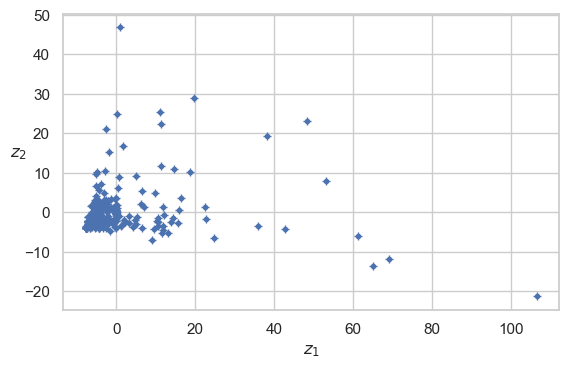

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
# ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
#          head_length=0.1, fc='b', ec='b', linewidth=4)
# ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
#          head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
# ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
# save_fig("dataset_2d_plot")

In [79]:
# above is just a playing-around for the pca, do not consider results above

In [80]:
# ! pip install threadpoolctl
# ! pip install --upgrade threadpoolctl

In [81]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# preprocessing
T = preprocessing.Normalizer().fit_transform(Headhunter_Ability)

# change n_clusters to 2, 3 and 4 etc. to see the output patterns
n_clusters = 3 # number of cluster

# Clustering using KMeans
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit_predict(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
print(centroids)
print(labels)


[[0.20201052 0.11916049 0.24171817 0.21183074 0.0672193  0.13613742
  0.77161149]
 [0.26650131 0.54879838 0.24913482 0.16515808 0.2081186  0.18782229
  0.24275931]
 [0.78245627 0.07179992 0.17351702 0.14268307 0.07681867 0.16916035
  0.24458936]]
[0 0 0 1 0 2 1 1 1 1 1 1 1 0 1 2 0 1 0 0 0 0 1 0 2 1 0 1 0 1 2 0 1 1 0 1 0
 0 2 2 1 2 1 1 1 0 1 0 2 1 1 0 2 0 0 1 1 0 1 1 2 1 0 2 1 1 1 0 0 1 2 1 1 1
 0 1 1 1 2 1 2 2 2 0 2 1 2 2 2 1 1 0 2 1 2 0 0 1 0 1 1 2 1 0 0 1 1 0 0 1 2
 1 1 0 0 1 1 1 0 0 1 2 2 1 2 0 1 2 0 1 0 2 0 1 1 1 1 2 2 1 1 0 1 1 1 2 1 1
 2 0 1 1 0 0 1 0 1 2 2 1 0 2 1 2 0 0 1 0 1 2 1 1 1 1 1 2 2 1 2 1 2 2 1 0 2
 1 0 2 1 1 0 1 1 1 0 1 0 2 2 1 2 0 0 0 0 1 1 0 1 1 0 0 0 2 1 2 1 1 0 1 1 1
 0 1 0 0 1 0 1 1 1 2 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1]


/Users/anothergreenday/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [82]:
labels

# the labels here are the clustering results for all headhunters. they are grouped into 3 clusters: 0, 1, 2

array([0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1,
       1, 0, 1, 0, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       1, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0,
       1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

In [83]:

# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)

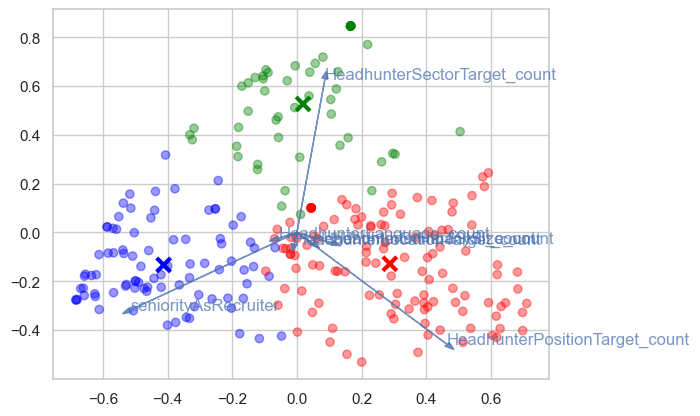

In [84]:
# plot the results

# colors for plotting
colors = ['blue', 'red', 'green'
          # 'orange', 'black', 'brown'
         ]
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = Headhunter_Ability.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.0005,
                head_width=0.02, alpha=0.75
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.show()

/Users/anothergreenday/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[[0.22411949 0.1248801  0.25144837 0.20902238 0.08342057 0.1285566
  0.7470824 ]
 [0.42076311 0.42097462 0.21984016 0.15681429 0.16561782 0.18964122
  0.2251171 ]]
[0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1]


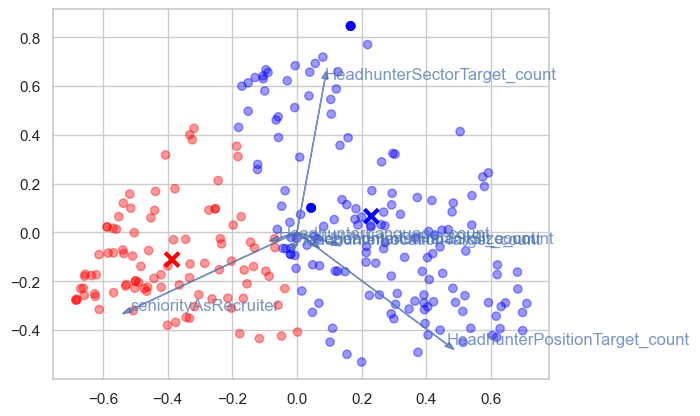

In [85]:
# maybe just two clusters: good and not good headhunter
# we combine the above code blocks into one

import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# preprocessing
T = preprocessing.Normalizer().fit_transform(Headhunter_Ability)

# change n_clusters to 2, 3 and 4 etc. to see the output patterns
n_clusters = 2 # number of cluster

# Clustering using KMeans
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit_predict(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
print(centroids)
print(labels)


# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)



# plot the results

# colors for plotting
colors = ['red', 'blue'
          # 'green'
          # 'orange', 'black', 'brown'
         ]
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = Headhunter_Ability.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.0005,
                head_width=0.02, alpha=0.75
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.show()

In [86]:
# two cluster make more sense, as headhunters with lower ability tends to have less seniority,
# while good headhunters tend to have more target sectors and more target positions!!!

### Clustering of Headhunters Activity

In [ ]:
# Secondly, we do activity (any feaures about the mission and activity on the platform)
# the chosen features of activity are:
# rating
# points
# lastest activity till now (in days)
# mission accepted number/onboarded days till now
# candidate proposed number/onboarded days till now

# later we could add (we do not have this in the database)
# candidate matched successful rate


In [89]:
# rating
# points
# lastest activity till now (in days)
Headhunter = pd.read_csv('Headhunter.csv')
Headhunter = Headhunter[['email','rating','points', 'onboarded', 'activity']]
Headhunter = Headhunter.rename(columns={'email': 'headhunter'})

# mission accepted number
AcceptedMission = pd.read_csv('AcceptedMission.csv')
AcceptedMission = AcceptedMission[['headhunter']]


# candidate proposed number
MissionCandidate = pd.read_csv('MissionCandidate.csv')
MissionCandidate = MissionCandidate[['headhunter']]


In [90]:
AcceptedMission_count = AcceptedMission.groupby(['headhunter'])['headhunter'].count().reset_index(name="AcceptedMission_count")
AcceptedMission_count.head(3)

headhunter  AcceptedMission_count
0  Coralie@cbs-itconsulting.fr                      5
1           aira156d@gmail.com                      2
2       akashshar007@gmail.com                      2

In [91]:
MissionCandidate_count = MissionCandidate.groupby(['headhunter'])['headhunter'].count().reset_index(name="MissionCandidate_count")
MissionCandidate_count.head(3)

headhunter  MissionCandidate_count
0           Prince@becrosspath.com                       6
1        akinolabolanle3@gmail.com                       2
2  alankritsingh.rathore@gmail.com                      12

In [96]:
# then we outer join all those dataframes:
Headhunter_Activity=pd.merge(AcceptedMission_count,Headhunter, on='headhunter', how='outer').merge(
    MissionCandidate_count, on='headhunter', how='outer')


Headhunter_Activity = Headhunter_Activity.drop(columns=['headhunter'])
Headhunter_Activity

AcceptedMission_count  rating  points            onboarded  \
0                      5.0     5.0     0.0                  NaN   
1                      2.0     5.0     0.0  2023-03-31 13:19:01   
2                      2.0     5.0     0.0  2023-04-04 20:15:58   
3                      4.0     NaN     NaN                  NaN   
4                     10.0     5.0    50.0  2023-04-03 19:08:59   
..                     ...     ...     ...                  ...   
295                    NaN     5.0     0.0  2023-03-24 13:54:04   
296                    NaN     5.0     0.0  2023-04-17 21:07:52   
297                    NaN     5.0     0.0  2023-02-23 11:36:48   
298                    NaN     5.0     0.0  2023-03-11 02:06:30   
299                    NaN     5.0     0.0  2023-04-11 06:58:05   

                activity  MissionCandidate_count  
0                    NaN                     NaN  
1    2023-04-18 16:37:17                     NaN  
2                    NaN                     NaN  
3                    NaN                     2.0  
4    2023-04-21 06:19:52                    12.0  
..                   ...                     ...  
295                  NaN                     NaN  
296  2023-04-18 13:09:20                     NaN  
297                  NaN                     NaN  
298                  NaN                     NaN  
299                  NaN                     NaN  

[300 rows x 6 columns]

In [115]:
import datetime



# for the LatestActivityTimeTillNow
# to recognise the time format
Headhunter_Activity['activity'] = pd.to_datetime(Headhunter_Activity['activity'])
# to calculate the time difference
Headhunter_Activity['LatestActivityTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['activity'] 
# extract the days till now
Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityTimeTillNow'].astype(str).str[0:2]
Headhunter_Activity = Headhunter_Activity.replace('Na',0)
Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityDaysTillNow'].astype(float)

# for the onboardedTimeTillNow
# to recognise the time format
Headhunter_Activity['onboarded'] = pd.to_datetime(Headhunter_Activity['onboarded'])
# to calculate the time difference
Headhunter_Activity['onboardedTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['onboarded'] 
# extract the days till now
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedTimeTillNow'].astype(str).str[0:2]
Headhunter_Activity = Headhunter_Activity.replace('Na',0)
# change str type to integer
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedDaysTillNow'].astype(float)

# below are code for feature engineering
# calculate MissionCandidate_count/onboardedDaysTillNow and AcceptedMission_count/onboardedDaysTillNow
Headhunter_Activity['CandidateSourced_perDay'] =  Headhunter_Activity['MissionCandidate_count']/Headhunter_Activity['onboardedDaysTillNow']
Headhunter_Activity['AcceptedMission_perDay'] =  Headhunter_Activity['AcceptedMission_count']/Headhunter_Activity['onboardedDaysTillNow']


Headhunter_Activity

AcceptedMission_count  rating  points           onboarded  \
0                      5.0     5.0     0.0                 NaT   
1                      2.0     5.0     0.0 2023-03-31 13:19:01   
2                      2.0     5.0     0.0 2023-04-04 20:15:58   
3                      4.0     NaN     NaN                 NaT   
4                     10.0     5.0    50.0 2023-04-03 19:08:59   
..                     ...     ...     ...                 ...   
295                    NaN     5.0     0.0 2023-03-24 13:54:04   
296                    NaN     5.0     0.0 2023-04-17 21:07:52   
297                    NaN     5.0     0.0 2023-02-23 11:36:48   
298                    NaN     5.0     0.0 2023-03-11 02:06:30   
299                    NaN     5.0     0.0 2023-04-11 06:58:05   

               activity  MissionCandidate_count LatestActivityTimeTillNow  \
0                   NaT                     NaN                       NaT   
1   2023-04-18 16:37:17                     NaN   33 days 23:26:12.625330   
2                   NaT                     NaN                       NaT   
3                   NaT                     2.0                       NaT   
4   2023-04-21 06:19:52                    12.0   31 days 09:43:37.625330   
..                  ...                     ...                       ...   
295                 NaT                     NaN                       NaT   
296 2023-04-18 13:09:20                     NaN   34 days 02:54:09.625330   
297                 NaT                     NaN                       NaT   
298                 NaT                     NaN                       NaT   
299                 NaT                     NaN                       NaT   

       onboardedTimeTillNow  LatestActivityDaysTillNow  onboardedDaysTillNow  \
0                       NaT                        0.0                   0.0   
1   52 days 02:44:28.632318                       33.0                  52.0   
2   47 days 19:47:31.632318                        0.0                  47.0   
3                       NaT                        0.0                   0.0   
4   48 days 20:54:30.632318                       31.0                  48.0   
..                      ...                        ...                   ...   
295 59 days 02:09:25.632318                        0.0                  59.0   
296 34 days 18:55:37.632318                       34.0                  34.0   
297 88 days 04:26:41.632318                        0.0                  88.0   
298 72 days 13:56:59.632318                        0.0                  72.0   
299 41 days 09:05:24.632318                        0.0                  41.0   

     CandidateSourced_perDay  AcceptedMission_perDay  
0                        NaN                     inf  
1                        NaN                0.038462  
2                        NaN                0.042553  
3                        inf                     inf  
4                       0.25                0.208333  
..                       ...                     ...  
295                      NaN                     NaN  
296                      NaN                     NaN  
297                      NaN                     NaN  
298                      NaN                     NaN  
299                      NaN                     NaN  

[300 rows x 12 columns]

In [117]:
# Headhunter_Activity = Headhunter_Activity.fillna(0) # fill na with 0
Headhunter_Activity = Headhunter_Activity.drop(columns=['onboarded', 'activity', 'LatestActivityTimeTillNow', 'onboardedTimeTillNow'])
Headhunter_Activity

AcceptedMission_count  rating  points  MissionCandidate_count  \
0                      5.0     5.0     0.0                     NaN   
1                      2.0     5.0     0.0                     NaN   
2                      2.0     5.0     0.0                     NaN   
3                      4.0     NaN     NaN                     2.0   
4                     10.0     5.0    50.0                    12.0   
..                     ...     ...     ...                     ...   
295                    NaN     5.0     0.0                     NaN   
296                    NaN     5.0     0.0                     NaN   
297                    NaN     5.0     0.0                     NaN   
298                    NaN     5.0     0.0                     NaN   
299                    NaN     5.0     0.0                     NaN   

     LatestActivityDaysTillNow  onboardedDaysTillNow  CandidateSourced_perDay  \
0                          0.0                   0.0                      NaN   
1                         33.0                  52.0                      NaN   
2                          0.0                  47.0                      NaN   
3                          0.0                   0.0                      inf   
4                         31.0                  48.0                     0.25   
..                         ...                   ...                      ...   
295                        0.0                  59.0                      NaN   
296                       34.0                  34.0                      NaN   
297                        0.0                  88.0                      NaN   
298                        0.0                  72.0                      NaN   
299                        0.0                  41.0                      NaN   

     AcceptedMission_perDay  
0                       inf  
1                  0.038462  
2                  0.042553  
3                       inf  
4                  0.208333  
..                      ...  
295                     NaN  
296                     NaN  
297                     NaN  
298                     NaN  
299                     NaN  

[300 rows x 8 columns]

In [118]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
Headhunter_Activity.to_csv('folder/subfolder/Headhunter_Activity_engineered.csv') 

In [ ]:
# above is the dataset with feature engineering, they have inf, which is not analysable
# below we will use data without feature engineering

In [140]:
# just copy the previous code

# rating
# points
# lastest activity till now (in days)
Headhunter = pd.read_csv('Headhunter.csv')
Headhunter = Headhunter[['email','rating','points', 'onboarded', 'activity']]
Headhunter = Headhunter.rename(columns={'email': 'headhunter'})

# mission accepted number
AcceptedMission = pd.read_csv('AcceptedMission.csv')
AcceptedMission = AcceptedMission[['headhunter']]


# candidate proposed number
MissionCandidate = pd.read_csv('MissionCandidate.csv')
MissionCandidate = MissionCandidate[['headhunter']]


AcceptedMission_count = AcceptedMission.groupby(['headhunter'])['headhunter'].count().reset_index(name="AcceptedMission_count")
AcceptedMission_count.head(3)

MissionCandidate_count = MissionCandidate.groupby(['headhunter'])['headhunter'].count().reset_index(name="MissionCandidate_count")
MissionCandidate_count.head(3)

# then we outer join all those dataframes:
Headhunter_Activity=pd.merge(AcceptedMission_count,Headhunter, on='headhunter', how='outer').merge(
    MissionCandidate_count, on='headhunter', how='outer')

Headhunter_Activity = Headhunter_Activity.drop(columns=['headhunter'])
Headhunter_Activity.head()

AcceptedMission_count  rating  points            onboarded  \
0                    5.0     5.0     0.0                  NaN   
1                    2.0     5.0     0.0  2023-03-31 13:19:01   
2                    2.0     5.0     0.0  2023-04-04 20:15:58   
3                    4.0     NaN     NaN                  NaN   
4                   10.0     5.0    50.0  2023-04-03 19:08:59   

              activity  MissionCandidate_count  
0                  NaN                     NaN  
1  2023-04-18 16:37:17                     NaN  
2                  NaN                     NaN  
3                  NaN                     2.0  
4  2023-04-21 06:19:52                    12.0

In [141]:
import datetime



# for the LatestActivityTimeTillNow
# to recognise the time format
Headhunter_Activity['activity'] = pd.to_datetime(Headhunter_Activity['activity'])
# to calculate the time difference
Headhunter_Activity['LatestActivityTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['activity'] 
# extract the days till now
Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityTimeTillNow'].astype(str).str[0:2]
Headhunter_Activity = Headhunter_Activity.replace('Na',0)
Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityDaysTillNow'].astype(float)

# for the onboardedTimeTillNow
# to recognise the time format
Headhunter_Activity['onboarded'] = pd.to_datetime(Headhunter_Activity['onboarded'])
# to calculate the time difference
Headhunter_Activity['onboardedTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['onboarded'] 
# extract the days till now
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedTimeTillNow'].astype(str).str[0:2]
Headhunter_Activity = Headhunter_Activity.replace('Na',0)
# change str type to integer
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedDaysTillNow'].astype(float)


Headhunter_Activity = Headhunter_Activity.drop(columns=['onboarded', 'activity', 'LatestActivityTimeTillNow', 'onboardedTimeTillNow'])


Headhunter_Activity.head()

AcceptedMission_count  rating  points  MissionCandidate_count  \
0                    5.0     5.0     0.0                     NaN   
1                    2.0     5.0     0.0                     NaN   
2                    2.0     5.0     0.0                     NaN   
3                    4.0     NaN     NaN                     2.0   
4                   10.0     5.0    50.0                    12.0   

   LatestActivityDaysTillNow  onboardedDaysTillNow  
0                        0.0                   0.0  
1                       33.0                  52.0  
2                        0.0                  47.0  
3                        0.0                   0.0  
4                       31.0                  48.0

In [143]:
Headhunter_Activity = Headhunter_Activity.fillna(0) # fill na with 0


Headhunter_Activity

AcceptedMission_count  rating  points  MissionCandidate_count  \
0                      5.0     5.0     0.0                     0.0   
1                      2.0     5.0     0.0                     0.0   
2                      2.0     5.0     0.0                     0.0   
3                      4.0     0.0     0.0                     2.0   
4                     10.0     5.0    50.0                    12.0   
..                     ...     ...     ...                     ...   
295                    0.0     5.0     0.0                     0.0   
296                    0.0     5.0     0.0                     0.0   
297                    0.0     5.0     0.0                     0.0   
298                    0.0     5.0     0.0                     0.0   
299                    0.0     5.0     0.0                     0.0   

     LatestActivityDaysTillNow  onboardedDaysTillNow  
0                          0.0                   0.0  
1                         33.0                  52.0  
2                          0.0                  47.0  
3                          0.0                   0.0  
4                         31.0                  48.0  
..                         ...                   ...  
295                        0.0                  59.0  
296                       34.0                  34.0  
297                        0.0                  88.0  
298                        0.0                  72.0  
299                        0.0                  41.0  

[300 rows x 6 columns]

In [148]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
Headhunter_Activity.to_csv('folder/subfolder/Headhunter_Activity.csv') 

[[0.02768641 0.08963499 0.05248197 0.02557455 0.19650773 0.90135069]
 [0.43668613 0.39497203 0.15090856 0.09347127 0.04575925 0.01861494]]
[1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0
 0 0 0 0]


/Users/anothergreenday/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



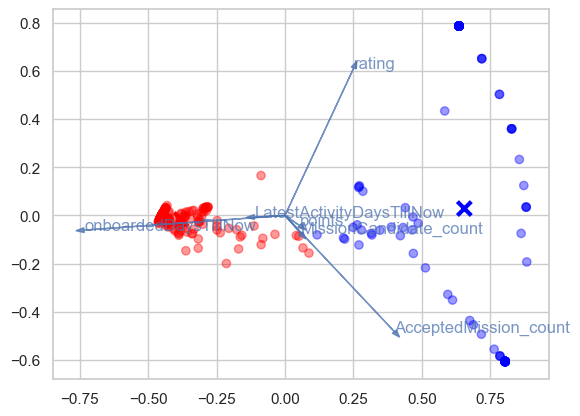

In [147]:
# maybe just two clusters: good and not good headhunter
# we combine the above code blocks into one

import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# preprocessing
T = preprocessing.Normalizer().fit_transform(Headhunter_Activity)

# change n_clusters to 2, 3 and 4 etc. to see the output patterns
n_clusters = 2 # number of cluster

# Clustering using KMeans
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit_predict(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_
print(centroids)
print(labels)


# Dimesionality reduction to 2
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T) # transform the 'normalized model'
# transform the 'centroids of KMean'
centroid_pca = pca_model.transform(centroids)
# print(centroid_pca)



# plot the results

# colors for plotting
colors = ['red', 'blue'
          # 'green'
          # 'orange', 'black', 'brown'
         ]
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[labels[i]] for i in range(len(T)) ]

# plot the PCA components
plt.scatter(T[:, 0], T[:, 1],
            c=features_colors, marker='o',
            alpha=0.4
        )

# plot the centroids
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])
columns = Headhunter_Activity.columns

# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.0005,
                head_width=0.02, alpha=0.75
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.show()

In [190]:
# if we do not use LatestActivityDaysTillNow and drop all onboardedDaysTillNow==0

# just copy the previous code

# rating
# points
# lastest activity till now (in days)
Headhunter = pd.read_csv('Headhunter.csv')
Headhunter = Headhunter[['email', 'onboarded', 'seniorityAsRecruiter']]
Headhunter = Headhunter.rename(columns={'email': 'headhunter'})

# mission accepted number
AcceptedMission = pd.read_csv('AcceptedMission.csv')
AcceptedMission = AcceptedMission[['headhunter']]


# candidate proposed number
MissionCandidate = pd.read_csv('MissionCandidate.csv')
MissionCandidate = MissionCandidate[['headhunter']]


AcceptedMission_count = AcceptedMission.groupby(['headhunter'])['headhunter'].count().reset_index(name="AcceptedMission_count")
AcceptedMission_count.head(3)

MissionCandidate_count = MissionCandidate.groupby(['headhunter'])['headhunter'].count().reset_index(name="MissionCandidate_count")
MissionCandidate_count.head(3)

# then we outer join all those dataframes:
Headhunter_Activity=pd.merge(AcceptedMission_count,Headhunter, on='headhunter', how='outer').merge(
    MissionCandidate_count, on='headhunter', how='outer')

Headhunter_Activity = Headhunter_Activity.drop(columns=['headhunter'])
Headhunter_Activity.head()

AcceptedMission_count            onboarded seniorityAsRecruiter  \
0                    5.0                  NaN    10 years and more   
1                    2.0  2023-03-31 13:19:01         6 to 9 years   
2                    2.0  2023-04-04 20:15:58         1 to 2 years   
3                    4.0                  NaN                  NaN   
4                   10.0  2023-04-03 19:08:59     Less than 1 year   

   MissionCandidate_count  
0                     NaN  
1                     NaN  
2                     NaN  
3                     2.0  
4                    12.0

In [191]:
import datetime



# # for the LatestActivityTimeTillNow
# # to recognise the time format
# Headhunter_Activity['activity'] = pd.to_datetime(Headhunter_Activity['activity'])
# # to calculate the time difference
# Headhunter_Activity['LatestActivityTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['activity'] 
# # extract the days till now
# Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityTimeTillNow'].astype(str).str[0:2]
# Headhunter_Activity = Headhunter_Activity.replace('Na',0)
# Headhunter_Activity['LatestActivityDaysTillNow'] = Headhunter_Activity['LatestActivityDaysTillNow'].astype(float)

# for the onboardedTimeTillNow
# to recognise the time format
Headhunter_Activity['onboarded'] = pd.to_datetime(Headhunter_Activity['onboarded'])
# to calculate the time difference
Headhunter_Activity['onboardedTimeTillNow'] = datetime.datetime.now() - Headhunter_Activity['onboarded'] 
# extract the days till now
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedTimeTillNow'].astype(str).str[0:2]
Headhunter_Activity = Headhunter_Activity.replace('Na',0)
# change str type to integer
Headhunter_Activity['onboardedDaysTillNow'] = Headhunter_Activity['onboardedDaysTillNow'].astype(float)


Headhunter_Activity = Headhunter_Activity.drop(columns=['onboarded', 'onboardedTimeTillNow'])

# drop all onboardedTimeTillNow==0
Headhunter_Activity = Headhunter_Activity.drop(Headhunter_Activity[Headhunter_Activity.onboardedDaysTillNow == 0].index)



# we need to encode the categorical data to let them analysable
mymap = {'No experience':0,'Less than 1 year':0.5, '1 to 2 years':1.5, '3 to 5 years':4, '6 to 9 years':7.5, '10 years and more':15}

Headhunter_Activity = Headhunter_Activity.applymap(lambda s: mymap.get(s) if s in mymap else s)




Headhunter_Activity

AcceptedMission_count  seniorityAsRecruiter  MissionCandidate_count  \
1                      2.0                   7.5                     NaN   
2                      2.0                   1.5                     NaN   
4                     10.0                   0.5                    12.0   
5                      1.0                  15.0                     NaN   
9                      1.0                   4.0                     NaN   
..                     ...                   ...                     ...   
295                    NaN                   7.5                     NaN   
296                    NaN                   7.5                     NaN   
297                    NaN                   0.5                     NaN   
298                    NaN                   0.5                     NaN   
299                    NaN                  15.0                     NaN   

     onboardedDaysTillNow  
1                    52.0  
2                    48.0  
4                    49.0  
5                    35.0  
9                    32.0  
..                    ...  
295                  59.0  
296                  35.0  
297                  88.0  
298                  73.0  
299                  42.0  

[202 rows x 4 columns]

In [192]:
# below are code for feature engineering
# calculate MissionCandidate_count/onboardedDaysTillNow and AcceptedMission_count/onboardedDaysTillNow
Headhunter_Activity['CandidateSourced_perDay'] =  Headhunter_Activity['MissionCandidate_count']/Headhunter_Activity['onboardedDaysTillNow']
Headhunter_Activity['AcceptedMission_perDay'] =  Headhunter_Activity['AcceptedMission_count']/Headhunter_Activity['onboardedDaysTillNow']
Headhunter_Activity

AcceptedMission_count  seniorityAsRecruiter  MissionCandidate_count  \
1                      2.0                   7.5                     NaN   
2                      2.0                   1.5                     NaN   
4                     10.0                   0.5                    12.0   
5                      1.0                  15.0                     NaN   
9                      1.0                   4.0                     NaN   
..                     ...                   ...                     ...   
295                    NaN                   7.5                     NaN   
296                    NaN                   7.5                     NaN   
297                    NaN                   0.5                     NaN   
298                    NaN                   0.5                     NaN   
299                    NaN                  15.0                     NaN   

     onboardedDaysTillNow  CandidateSourced_perDay  AcceptedMission_perDay  
1                    52.0                      NaN                0.038462  
2                    48.0                      NaN                0.041667  
4                    49.0                 0.244898                0.204082  
5                    35.0                      NaN                0.028571  
9                    32.0                      NaN                0.031250  
..                    ...                      ...                     ...  
295                  59.0                      NaN                     NaN  
296                  35.0                      NaN                     NaN  
297                  88.0                      NaN                     NaN  
298                  73.0                      NaN                     NaN  
299                  42.0                      NaN                     NaN  

[202 rows x 6 columns]

In [193]:
Headhunter_Activity = Headhunter_Activity.drop(columns=['AcceptedMission_count','MissionCandidate_count', 'onboardedDaysTillNow'])


Headhunter_Activity = Headhunter_Activity.fillna(0) # fill na with 0

Headhunter_Activity = Headhunter_Activity.drop(Headhunter_Activity[(Headhunter_Activity['CandidateSourced_perDay'] == 0) & (Headhunter_Activity['AcceptedMission_perDay'] == 0)].index)


Headhunter_Activity

seniorityAsRecruiter  CandidateSourced_perDay  AcceptedMission_perDay
1                     7.5                 0.000000                0.038462
2                     1.5                 0.000000                0.041667
4                     0.5                 0.244898                0.204082
5                    15.0                 0.000000                0.028571
9                     4.0                 0.000000                0.031250
..                    ...                      ...                     ...
160                   7.5                 0.037037                0.055556
162                  15.0                 0.321429                0.071429
164                  15.0                 0.101695                0.084746
194                   4.0                 0.142857                0.000000
199                   0.5                 0.900000                0.000000

[103 rows x 3 columns]

In [194]:
import os  
os.makedirs('folder/subfolder', exist_ok=True)  
Headhunter_Activity.to_csv('folder/subfolder/Headhunter_Activity.csv') 

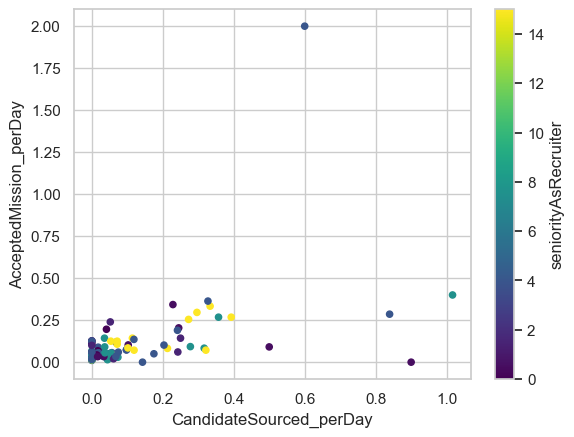

In [196]:
# plot the data with two axis

ax1 = Headhunter_Activity.plot.scatter(x='CandidateSourced_perDay', y='AcceptedMission_perDay', 
                                       c='seniorityAsRecruiter', colormap='viridis')